In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
url = "train.csv"
df = pd.read_csv(url)

# Step 3: Data Cleaning
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Handle missing values
# For simplicity, we'll fill missing values in 'Age' with the mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

# Since 'Cabin' has a large number of missing values, we'll drop the column
df.drop('Cabin', axis=1, inplace=True)

# For 'Embarked', which has only 2 missing values, we'll fill with the mode (most frequent value)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Confirm that there are no missing values left
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


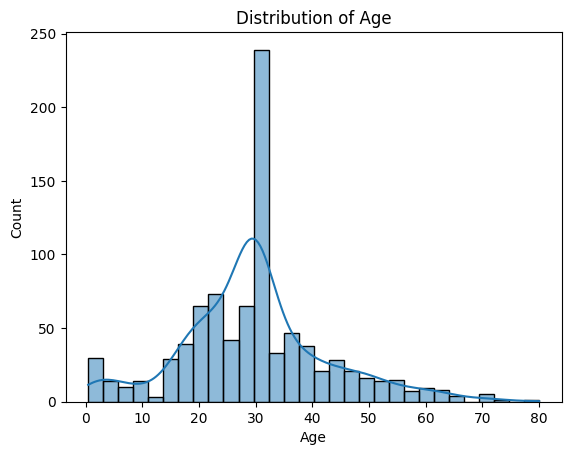

In [7]:
# Step 4: Exploratory Data Analysis (EDA)

# Basic statistics
print(df.describe())

# Visualize the distribution of numerical features
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

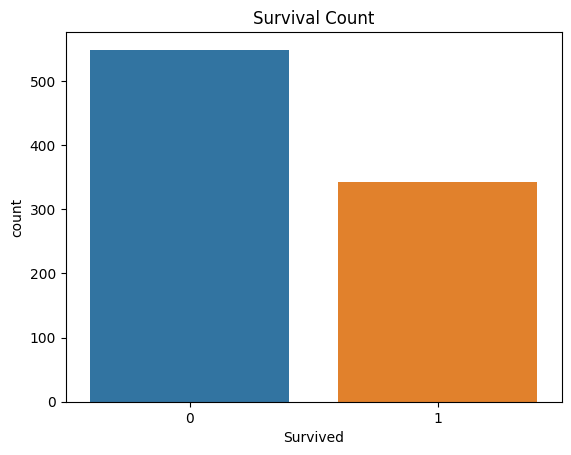

In [8]:
# Explore survival rates
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

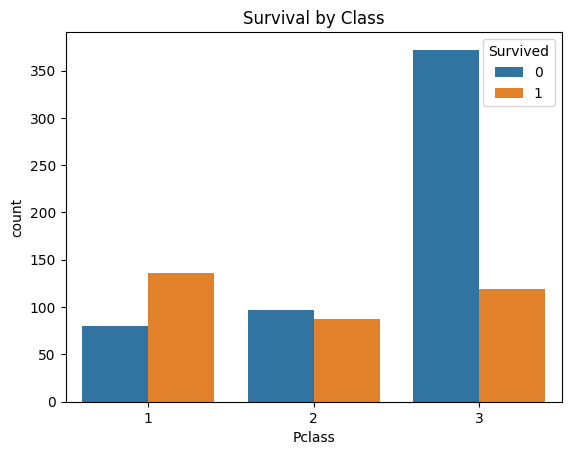

In [9]:
# Survival by class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Class')
plt.show()

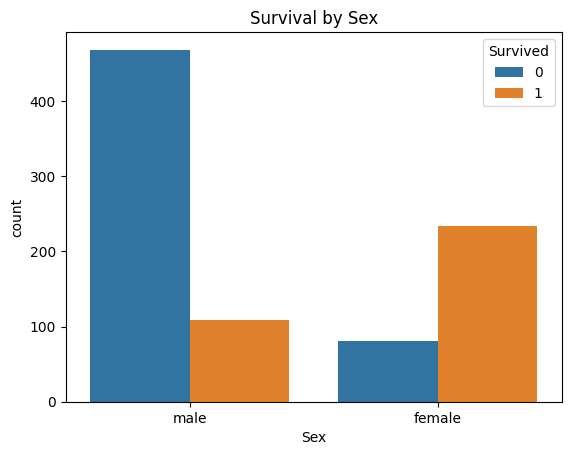

In [10]:
# Survival by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()

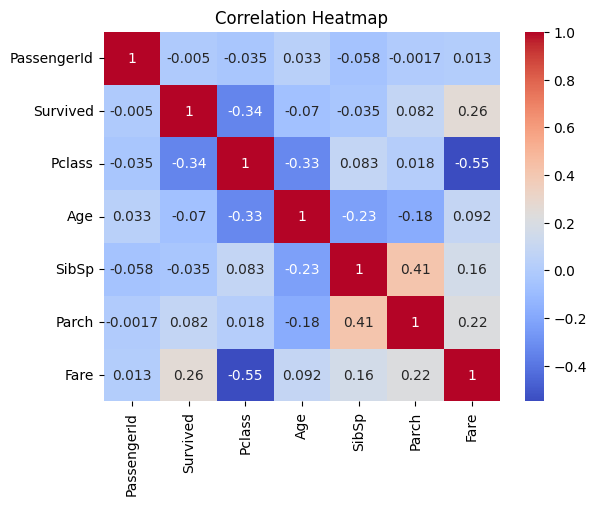

In [13]:
# Exclude non-numeric columns from correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Explore correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()